<a href="https://colab.research.google.com/github/mreza81960/mohamad/blob/main/shallow_epoch50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CECS-456 Project - Chess Piece Image Classification

Model #1: Shallow

Mohamad Rahai

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt

To make Kaggle dataset available to Colab, 1st the dataset was uploaded to Google Drive and then the drive was mounted to Colab.

Dataset path: //content/drive/MyDrive/Chessman-image-dataset/Chess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="//content/drive/MyDrive/Chessman-image-dataset/Chess"
data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split=0.2)
data_set=data_gen.flow_from_directory(data_dir, target_size=(28,28),
                                      color_mode='grayscale',
                                      class_mode='categorical', seed=42,
                                      subset='training')
print(type(data_set))
validation=data_gen.flow_from_directory(data_dir, target_size=(28,28),
                                      color_mode='grayscale',
                                      class_mode='categorical', seed=42,
                                      subset='validation')

Found 442 images belonging to 6 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 109 images belonging to 6 classes.


In [ ]:
#designing the layers
model=tf.keras.models.Sequential()
layer=tf.keras.layers
model.add(layer.Conv2D(64,(3,3),padding='same',activation='relu', input_shape=(28,28,1)))
model.add(layer.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(layer.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layer.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(layer.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layer.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layer.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(layer.Flatten())
model.add(layer.Dense(128,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(64,activation='relu'))
layer.Dropout(0.5)
model.add(layer.Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print (type(data_set))
history=model.fit(data_set,batch_size=100,epochs=50, validation_data=validation)

<class 'keras.preprocessing.image.DirectoryIterator'>
Epoch 1/50
14/14 [==============================] - 85s 6s/step - loss: 1.7926 - accuracy: 0.1855 - val_loss: 1.7829 - val_accuracy: 0.1927
Epoch 2/50
14/14 [==============================] - 16s 1s/step - loss: 1.7851 - accuracy: 0.1900 - val_loss: 1.7863 - val_accuracy: 0.1927
Epoch 3/50
14/14 [==============================] - 16s 1s/step - loss: 1.7872 - accuracy: 0.1900 - val_loss: 1.7787 - val_accuracy: 0.1927
Epoch 4/50
14/14 [==============================] - 16s 1s/step - loss: 1.7814 - accuracy: 0.1900 - val_loss: 1.7742 - val_accuracy: 0.1743
Epoch 5/50
14/14 [==============================] - 16s 1s/step - loss: 1.7740 - accuracy: 0.2059 - val_loss: 1.7662 - val_accuracy: 0.2385
Epoch 6/50
14/14 [==============================] - 15s 1s/step - loss: 1.7493 - accuracy: 0.2353 - val_loss: 1.7060 - val_accuracy: 0.2661
Epoch 7/50
14/14 [==============================] - 16s 1s/step - loss: 1.7195 - accuracy: 0.2670 - val_lo

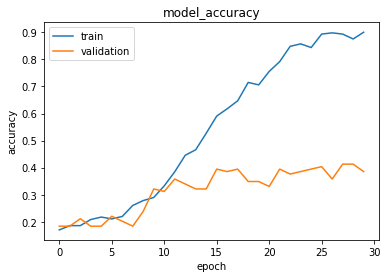

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')

In [ ]:
drive.flush_and_unmount()